In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
import freyberg_setup as fs
working_dirs = [fs.WORKING_DIR_UN,fs.WORKING_DIR_KR,fs.WORKING_DIR_ZN,
               fs.WORKING_DIR_PP,fs.WORKING_DIR_GR]
pst_names = [fs.PST_NAME_UN,fs.PST_NAME_KR,fs.PST_NAME_ZN,
             fs.PST_NAME_PP,fs.PST_NAME_GR]
setup_functions = [fs.setup_pest_un,fs.setup_pest_kr,fs.setup_pest_zn,
                   fs.setup_pest_pp,fs.setup_pest_gr]
num_workers = [1,1,1,10,20]

In [34]:
for setup_function in setup_functions:
    setup_function()

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_un
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_summary/freyberg_un/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOG

/Users/jwhite/Dev/python/pyemu/pyemu/pst/pst_utils.py:419: UserWarning: pst_from_io_files has moved to pyemu.helpers and is also now avaiable as a Pst class method (Pst.from_io_files())
  "now avaiable as a Pst class method (Pst.from_io_files())")


run():./inschek freyberg.travel.ins freyberg.travel
run():./inschek vol.dat.ins vol.dat
run():./pestchek freyberg_un.pst
run():./pestpp freyberg_un.init.pst
['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_kr
FloPy is using the following executable 


                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.1, 7/21/2016                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 07/21/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/08/28 21:30:57

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/08/28 21:30:57
 Elapsed run time:  0.024 Seconds

  Normal termination of simulation
run():./mp6 freyberg.mpsim
Util2d:delr: resetting 'how' to external
Util2d:delc: resetting 'how' to exter

## FOSM comparison

First run all the cases with ``noptmax``= -1

In [35]:
for nw, pst_name, wd in zip(num_workers,pst_names,working_dirs):
    pst = pyemu.Pst(os.path.join(wd,pst_name))
    pst.control_data.noptmax = -1
    pst.write(os.path.join(wd,pst_name))
    print(pst_name)
    #cwd = os.getcwd()
    #os.chdir(wd)
    #try:
    pyemu.helpers.start_slaves(wd,"pestpp",pst_name,num_slaves=nw,master_dir=wd+"_master")
    #except:
    #    os.chdir(cwd)
    #    break
    #os.chdir(cwd)

freyberg_un.pst
master:pestpp freyberg_un.pst /h :4004 in freyberg_un_master
slave:pestpp freyberg_un.pst /h localhost:4004 in ../slave_0
freyberg_kr.pst
master:pestpp freyberg_kr.pst /h :4004 in freyberg_kr_master
slave:pestpp freyberg_kr.pst /h localhost:4004 in ../slave_0
freyberg_zn.pst
master:pestpp freyberg_zn.pst /h :4004 in freyberg_zn_master
slave:pestpp freyberg_zn.pst /h localhost:4004 in ../slave_0
freyberg_pp.pst
master:pestpp freyberg_pp.pst /h :4004 in freyberg_pp_master
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:pestpp freyberg

Now loop through each ``master`` dir and construct a ``pyemu.Schur`` instance

In [3]:
schurs = []
for pst_name,wd in zip(pst_names,working_dirs):
    parcov = None
    if pst_name == fs.PST_NAME_PP:
        parcov = fs.build_prior_pp()
    elif pst_name == fs.PST_NAME_GR:
        parcov = fs.build_prior_gr()
    sc = pyemu.Schur(jco=os.path.join(wd+"_master",pst_name.replace(".pst",".jcb")),parcov=parcov)
    schurs.append(sc)

/Users/jwhite/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jwhite/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
prior,post,percent = [],[],[]
for schur in schurs:
    fc = schur.get_forecast_summary()
    prior.append(fc.loc[:,"prior_var"])
    post.append(fc.loc[:,"post_var"])
    percent.append(fc.loc[:,"percent_reduction"])
names = [pst.split('.')[0].split('_')[1] for pst in pst_names]    
prior = pd.concat(prior,axis=1).apply(np.sqrt)
prior.columns = names
post = pd.concat(post,axis=1).apply(np.sqrt)
post.columns = names
percent = pd.concat(percent,axis=1)
percent.columns = names


In [5]:
forecasts = list(prior.index.values)
wl_forecasts = [f for f in forecasts if f.startswith("fr")] 
rflx_forecast = [f for f in forecasts if f.startswith("fl")][0]
tt_forecast = "travel_time"
forecasts = [wl_forecasts,rflx_forecast,tt_forecast]
titles = ["water level","SW-GW exchange","travel time"]

### Prior uncertainty

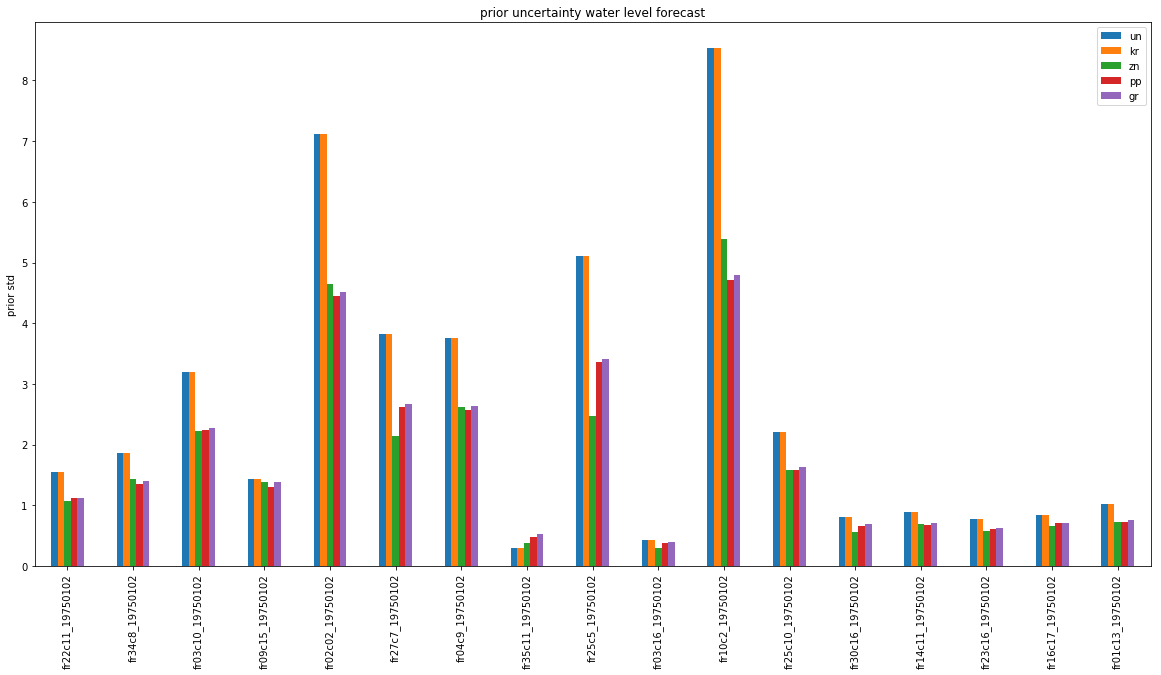

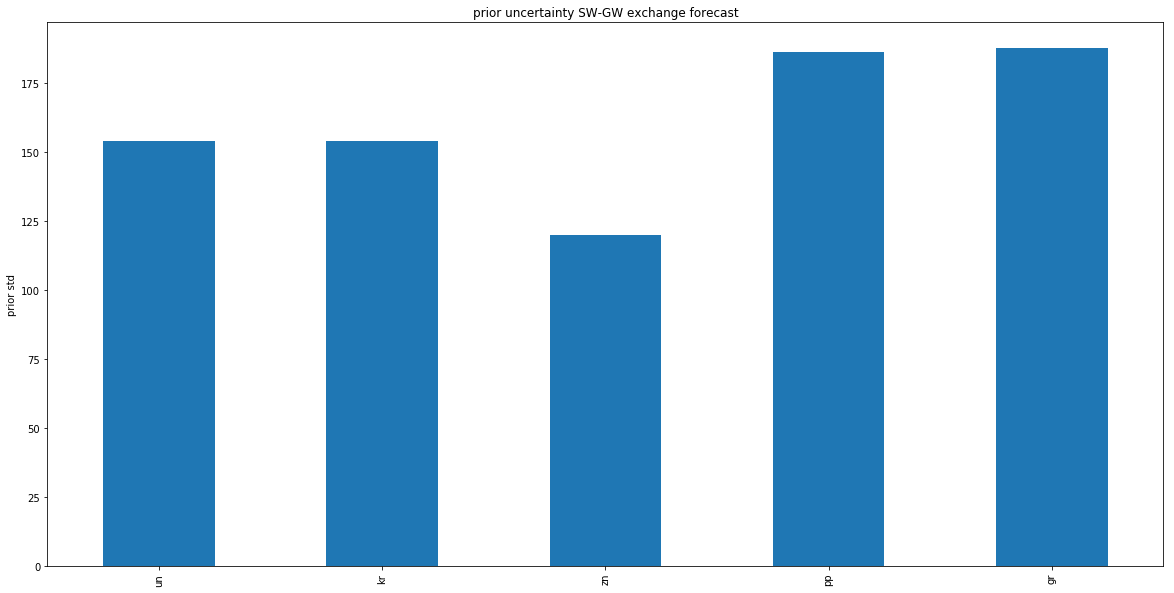

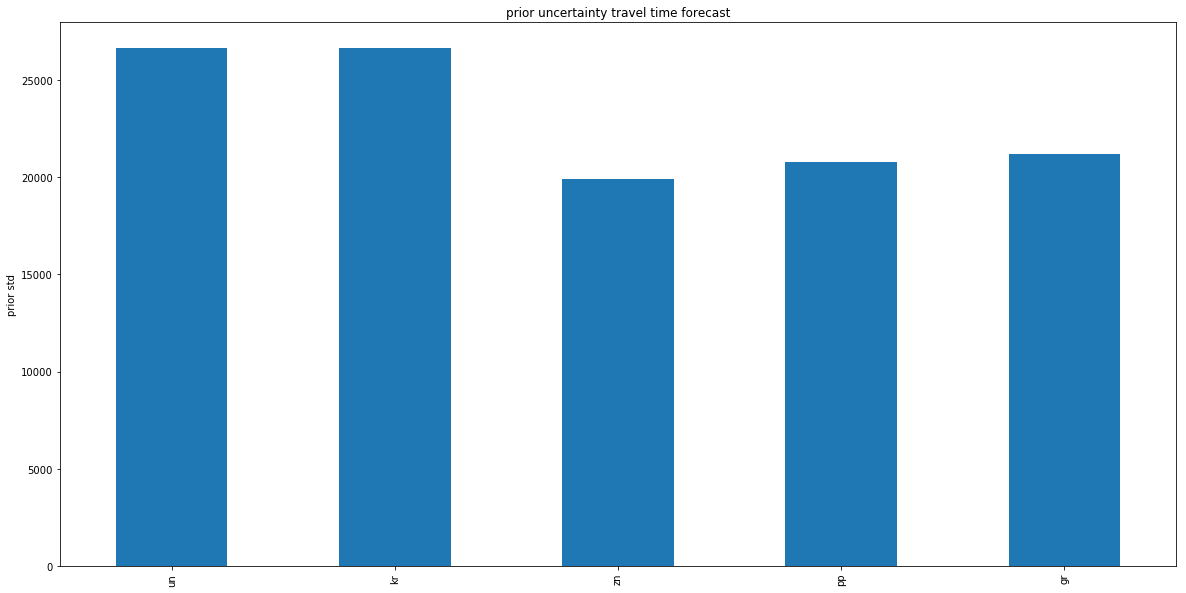

In [6]:
for forecast,title in zip(forecasts,titles):
    ax = prior.loc[forecast,:].plot(kind="bar",figsize=(20,10))
    ax.set_ylabel("prior std")
    ax.set_title("prior uncertainty {0} forecast".format(title))
    plt.show()

## Posterior uncertainty

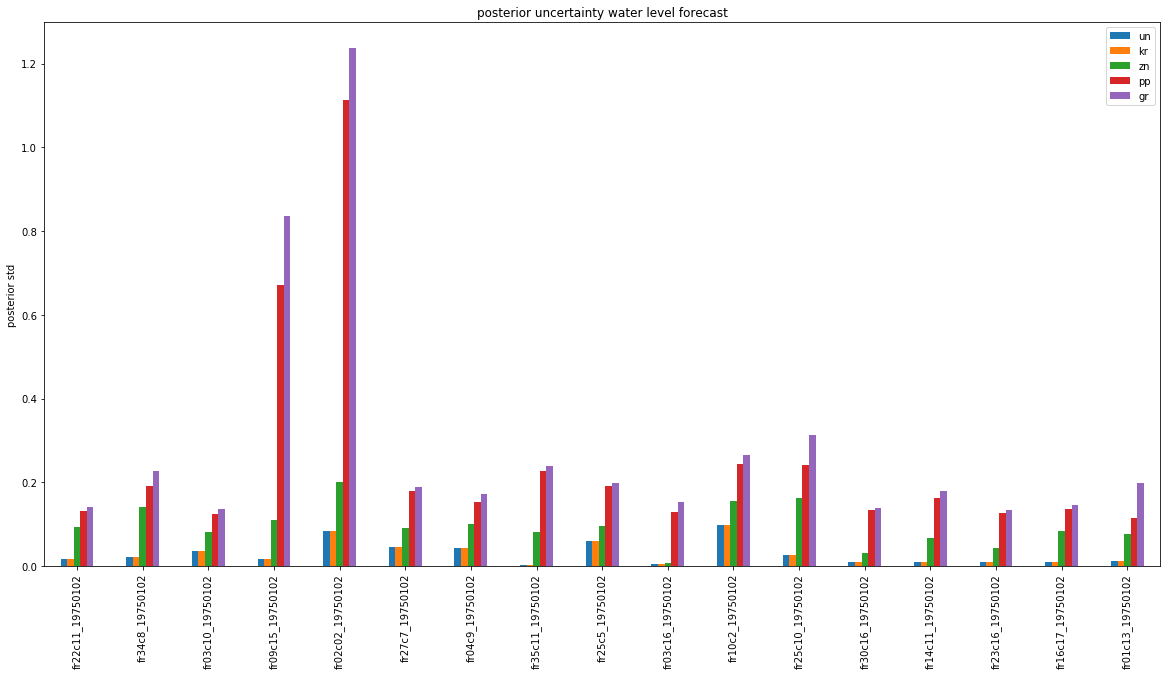

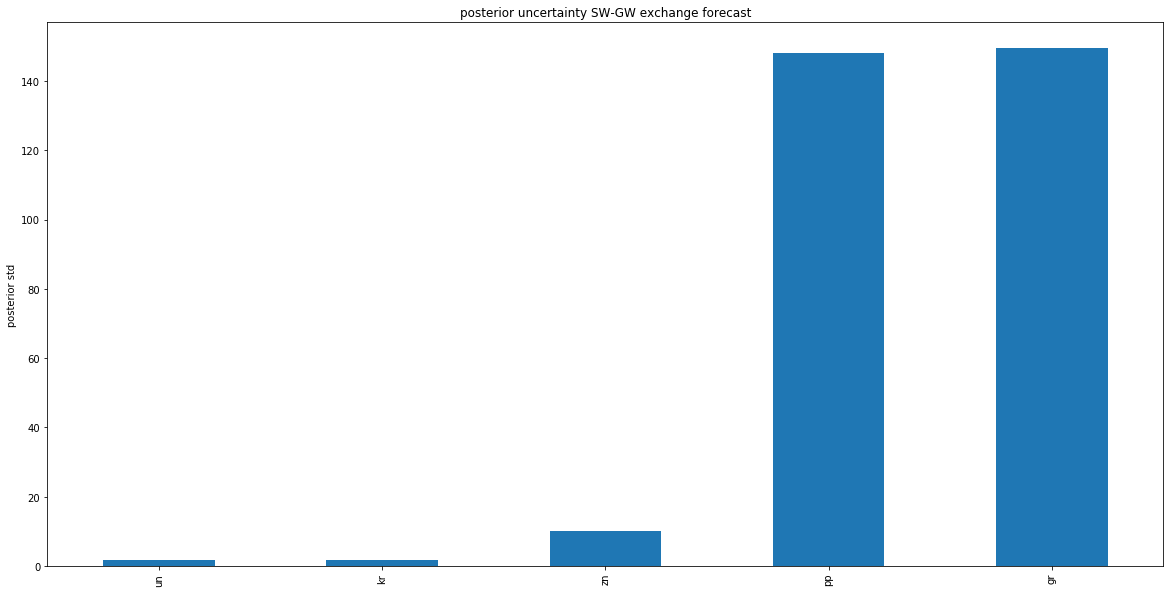

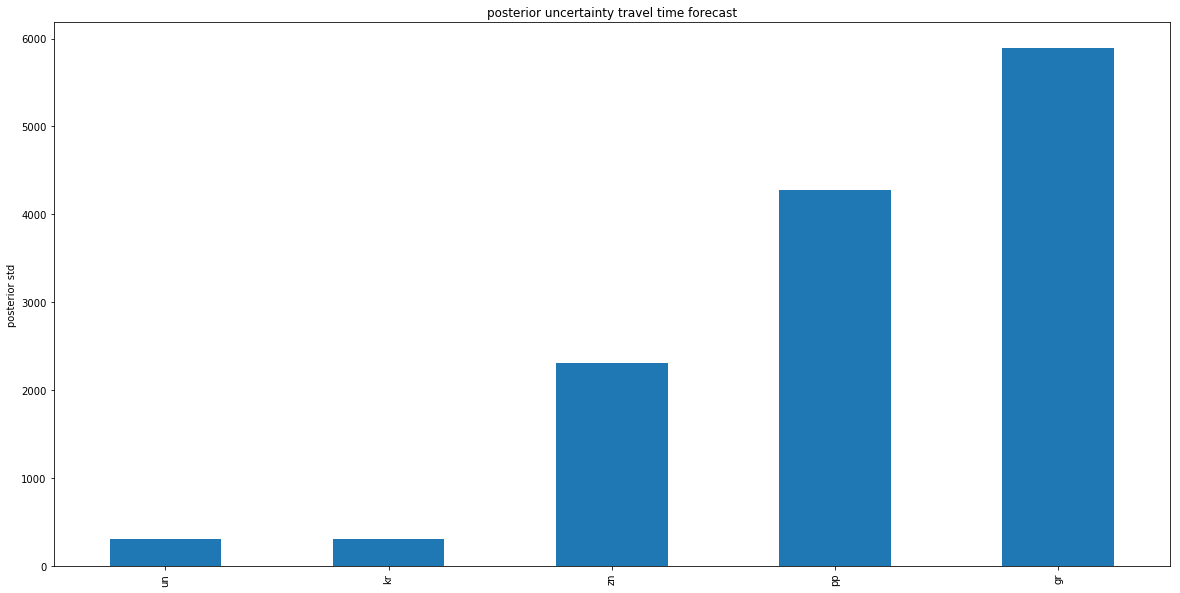

In [7]:
for forecast,title in zip(forecasts,titles):
    ax = post.loc[forecast,:].plot(kind="bar",figsize=(20,10))
    ax.set_ylabel("posterior std")
    ax.set_title("posterior uncertainty {0} forecast".format(title))
    plt.show()